In [1]:
import my_utilities_module as util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Dataframes implement the Pandas API
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import sys
from scipy import stats

In [2]:
new_big_df=pd.read_csv('big_df.csv',   error_bad_lines=False,low_memory=False)

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
new_big_df.shape

(1907317, 40)

In [4]:
new_big_df.head(5)

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,00000000000000225,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,endives,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN
2,0000000000031,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,NaN,...,685.8,1.9,1.00,NaN,NaN,NaN,15.3,1.1,0.44,NaN
4,000000000004622327,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,...,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.1,0.84,NaN


##### 2- Conception de l'application "GreenFood"
- Dans l'objectif d'encourager le consommateur d'acheter des produits qui ont moins d'impact négatif sur l'environnement et au même temps qui sont bien pour notre corps, je propose une application qui permet de proposer d'autres produits au consommateur, ayant le même nutriscore, mais protégeant mieux notre environnement ainsi que notre santé.  
- Consommer d'une manière bio, ou plutôt éthique, est l'objectif de mon application que je nommerai "GreenFood". 


- Le principe de l'application est le suivant: 

**1-** Le consommateur choisi un produit et scane son code-à-barre  
**2-** GreenFood détecte le scoreGrade du produit  
**3-** GreenFood récupère tous les produits sous la même catégorie et ayant le même nutriscoreGrade  
**4-** Une comparaison est établie entre l'ecoScore-Grade et NOVA Group du produit sélectionné et ceux des autres produits récupérés. Ainsi, GreenFood propose au consommateurs des produits de même catégorie et de même nutriscore , mais ayant un ecoScore et appartenant à un NOVA Group meilleur.

Dans ce but, les variable utiles pour notre application sont: {code,product_name, packaging, categories, nutriscore_score, nutriscore_grade, nova_group, ecoscore_score_fr, ecoscore_grade_fr}
il faut tout d'abord vérifier la qualité des variables utiles pour notre application. Pour celà, il faut vérifier:  
**1-** si le nutriscore-Grade correspond au nutriscrore-score
**2-** si l'ecoscore_score correspond au ecoscore_grade
**3** si la qualité de "packaging" correspond vraiment à la catégorie d'ecoscore_grade affecté.
**4** s'il y a des outliers/ valeurs aberrates

In [5]:
new_big_df.columns

Index(['code', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'quantity', 'packaging',
       'brands', 'categories', 'labels', 'countries', 'ingredients_text',
       'serving_size', 'serving_quantity', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'brand_owner', 'ecoscore_score_fr', 'ecoscore_grade_fr',
       'main_category', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [6]:
app_columns=['code','product_name', 'countries','categories','main_category', 'nutriscore_score', 'nutriscore_grade', 'nova_group','additives_n', 'ingredients_from_palm_oil_n','ecoscore_score_fr', 'ecoscore_grade_fr','energy_100g','fiber_100g', 'fat_100g','sugars_100g','salt_100g','proteins_100g', 'pnns_groups_1', 'pnns_groups_2']
new_big_df=new_big_df[app_columns]
new_big_df.head(30)

,code,product_name,countries,categories,main_category,nutriscore_score,nutriscore_grade,nova_group,additives_n,ingredients_from_palm_oil_n,ecoscore_score_fr,ecoscore_grade_fr,energy_100g,fiber_100g,fat_100g,sugars_100g,salt_100g,proteins_100g,pnns_groups_1,pnns_groups_2
0,00000000000000225,jeunes pousses,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
1,0000000000017,Vitória crackers,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1569.0,NaN,7.0,15.0,1.400,7.8,unknown,unknown
2,0000000000031,Cacao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
3,000000000003327986,Filetes de pollo empanado,Espagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.8,NaN,1.9,NaN,1.100,15.3,unknown,unknown
4,000000000004622327,Hamburguesas de ternera 100%,en:es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3661.0,NaN,15.1,1.0,2.100,15.7,unknown,unknown
5,0000000000100,moutarde au moût de raisin,France,"Epicerie, Condiments, Sauces, Moutardes",en:mustards,18.0,d,NaN,0.0,0.0,55.0,c,936.0,0.0,8.2,22.0,4.600,5.1,Fat and sauces,Dressings and sauces
6,00000000001111111111,Sfiudwx,en:France,Xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
7,0000000000123,Sauce Sweety chili 0%,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,0.0,0.4,2.040,0.2,unknown,unknown
8,0000000000178,Mini coco,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.0,NaN,3.0,3.0,1.150,2.0,unknown,unknown
9,0000000000208,Pistou d'ail des ours,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown


<AxesSubplot:>

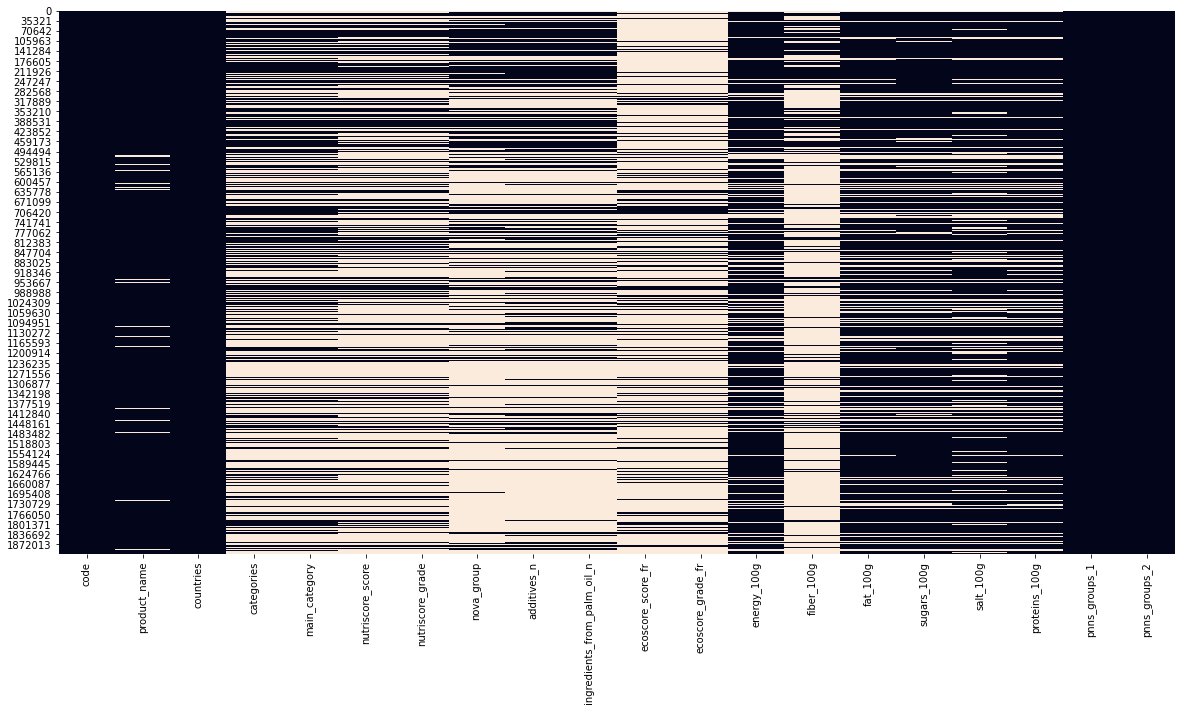

In [7]:
#vérifier les valeurs manquantes dans notre nouveau dataset
plt.figure(figsize=(20,10))
sns.heatmap(new_big_df.isna(), cbar=False)

### Choix de la colonne des catégories  
 Dans cette section, nous allors étudier les quatres colonnes qui contiennent les catégories des produits alimentaires à choisir pour notre application.  
 Pour celà, nous allons étudier les quatre colonnes 'categories', 'main_category', 'pnns_groups_1', 'pnns_groups_2'.  
 Notre objectif est de trouver la colonne qui contienne des catégories plus cleané, et qui assure le maximum le compromis entre valeurs manquantes et valeurs uniques. C'est à dire, avoir une colonne avec , par exemple, uniquement 10% des valeurs manquantes, nous sera inutile si le pourcentage des valeurs uniques par rapport au total est de l'ordre de 80%. Parce que ceci signifie qu'on a beaucoup de catégories ce qui serai un peu compliqué à gérer après dans le modèle de ML. Dans un autre exemple, une colonne avec 80% de valeurs manquantes, et 10% de valeurs unique, est aussi inutile vue qu'on a rien à faire avec une colonne quasi-vide.

In [8]:
pd.set_option("max_colwidth",9000)

categories_list=['categories', 'main_category', 'pnns_groups_1', 'pnns_groups_2']

stats_categories=pd.DataFrame(columns=['nom du colonne','nbre valeurs uniques','% de NaN','% de chaque valeur'])
for categ in categories_list:
    new_row={'nom du colonne':categ,
             'nbre valeurs uniques': new_big_df[categ].unique().size,
             '% de NaN': (new_big_df[categ].isnull().sum()/new_big_df[categ].shape[0])*100,
             '% de chaque valeur':(new_big_df[categ].value_counts(normalize=True)*100)}
    stats_categories=stats_categories.append(new_row, ignore_index=True)
stats_categories

,nom du colonne,nbre valeurs uniques,% de NaN,% de chaque valeur
0,categories,103647,52.753213,"Snacks 3.629379 Snacks, Sweet snacks, Confectioneries 1.585204 Groceries, Sauces 1.541704 Dairies, Fermented foods, Fermented milk products, Cheeses 1.268829 Snacks, Sweet snacks, Biscuits and cakes, Biscuits 1.123791 ... Produits laitiers, Matières grasses, Produits à tartiner, Matières grasses à tartiner, Matières grasses animales, Matière grasse laitière, Produits laitiers à tartiner, Beurres, Beurres doux, en:butter-82-fat-unsalted 0.000111 Produits laitiers, Produits fermentés, Produits laitiers fermentés, Yaourts, Yaourts aux fruits, Yaourts aux fruits avec morceaux, Yaourts à la poire 0.000111 Produits laitiers, Produits fermentés, Produits laitiers fermentés, Yaourts, Yaourts aux fruits, Yaourts au lait de vache, Yaourts au fruit de la passion 0.000111 Produits laitiers, Produits fermentés, Produits laitiers fermentés, Yaourts, Yaourts aux fruits, Yaourts à la mirabelle 0.000111 Kekse und Kuchen, Kuchen, Tiefkühl-Kuchen 0.000111 Name: categories, Length: 103646, dtype: float64"
1,main_category,30983,52.753423,"en:snacks 3.655362 en:sauces 1.791505 en:confectioneries 1.703616 en:biscuits 1.676761 en:cheeses 1.652903 ... fr:pacherenc 0.000111 fr:cerise-amande 0.000111 fr:saucisse-seche-au-fromage 0.000111 en:fenugreek-leaves 0.000111 hu:extrudált-kukorica 0.000111 Name: main_category, Length: 30982, dtype: float64"
2,pnns_groups_1,13,0.015781,"unknown 61.571586 Sugary snacks 8.008271 Fish Meat Eggs 5.377616 Milk and dairy products 4.813122 Cereals and potatoes 4.372695 Fat and sauces 3.745747 Beverages 3.580725 Fruits and vegetables 2.977374 Composite foods 2.898822 Salty snacks 1.774028 Alcoholic beverages 0.879909 sugary-snacks 0.000105 Name: pnns_groups_1, dtype: float64"
3,pnns_groups_2,43,0.015676,"unknown 61.571522 Sweets 3.618214 Biscuits and cakes 3.306628 Dressings and sauces 2.596934 Cheese 2.381257 One-dish meals 2.236057 Cereals 2.094946 Processed meat 2.076069 Milk and yogurt 1.704913 Vegetables 1.617604 Meat 1.605386 Fish and seafood 1.438581 Sweetened beverages 1.210162 Bread 1.154840 Fats 1.148809 Fruits 0.893437 Alcoholic beverages 0.880013 Chocolate products 0.757413 Salty and fatty products 0.748970 Appetizers 0.607126 Unsweetened beverages 0.549811 Fruit juices 0.508333 Breakfast cereals 0.498527 Artificially sweetened beverages 0.490871 Legumes 0.469267 Pizza pies and quiches 0.450337 Nuts 0.417930 Ice cream 0.368743 Waters and flavored waters 0.359252 Dairy desserts 0.358203 Pastries 0.326006 Dried fruits 0.318508 Plant-based milk substitutes 0.304979 Sandwiches 0.212373 Eggs 0.192132 Potatoes 0.155111 Soups 0.147822 Teas and herbal teas and coffees 0.085526 Fruit nectars 0.071787 Offals 0.065442 pastries 0.000105 Pizza pies and quiche 0.000052 Name: pnns_groups_2, dtype: float64"


### Remarques  
**1-** La première remarque qu'on peut voir, c'est concernant le pourcentage de nans. Pour 'pnns_groups_1', et 'pnns_groups_2', les pourcentages ne sont pas représentatives parce que , c'est noté "unknown" au lieu de NaN. et donc, les pourcentages de valeurs manquantes pour ces deux colonnes sont respectivement: 61,57%  et 61,57% (les pourcentage de 'unknown')  
**2-** La colonne 'categories' et 'main_categories' contiennent respectivement 103647 et 29843	de catégories, ce qui est énorme et difficile à traiter après.   
**3-** Pour les colonnes 'pnns_groups_1', 'pnns_groups_2', ils ont les deux le même pourcentage de valeurs manquantes. Le choix va donc reposer sur la qualité des données.  
**4** Je pense que  'pnns_groups_1', contient un nombre de catégories moins représentatifs par rapport aux produits existants. Par exemple, fish, Meat Eggs, sont trois catégories totalement différentes mais ils sont classés sous la même catégorie. Pareil pour 'Fat ans sauces' ou 'Fruits ans vegetables'. Je pense que cette catégorie regroupe le type de produit selon leur apports nutriftif. Ca pourra être utile pour prédire la nutriscore_grade (hypothès à vérifier!)  
**5-** Pour la colonne 'pnns_groups_2', je pense qu'elle assure le compromis entre pourcentage de valeurs manquantes (61%, c'est le meilleur pourcentage selon nos données) et nombre de valeurs uniques. Par contre, il y a quelques opérations de nettoyage à faire pour ces données:  
- Même catégorie en pluriel et aussi en singulier ( Pizza pies and quiche/Pizza pies and quiches),  

- Des catégories qui peuvent être regroupées  
  (sweets/Biscuits and cakes/ Ice cream/Chocolate products/ pastries/Pastries/Dairy desserts),   
  ( Processed meat/Meat/Offals),   
  (Fruit nectars/Fruit juices),   
  (Sweetened beverages/Artificially sweetened beverages/Unsweetened beverages/Alcoholic beverages),   
  (Plant-based milk substitutes/Milk and yogurt),   
  (Breakfast cereals/Cereals),   
  (Vegetables/Legumes),  
  (Dried fruits/Nuts).

In [9]:
new_big_df['pnns_groups_2'].value_counts(normalize=True)

unknown                             6.157152e-01
Sweets                              3.618214e-02
Biscuits and cakes                  3.306628e-02
Dressings and sauces                2.596934e-02
Cheese                              2.381257e-02
One-dish meals                      2.236057e-02
Cereals                             2.094946e-02
Processed meat                      2.076069e-02
Milk and yogurt                     1.704913e-02
Vegetables                          1.617604e-02
Meat                                1.605386e-02
Fish and seafood                    1.438581e-02
Sweetened beverages                 1.210162e-02
Bread                               1.154840e-02
Fats                                1.148809e-02
Fruits                              8.934368e-03
Alcoholic beverages                 8.800127e-03
Chocolate products                  7.574129e-03
Salty and fatty products            7.489704e-03
Appetizers                          6.071259e-03
Unsweetened beverage

In [10]:
# creer une nouvelle colonne en copiant 'pnns_groups_2'
new_big_df['final_categories'] = new_big_df['pnns_groups_2']

In [11]:
replacements = {
    'final_categories': {
       r'(sweets|Biscuits and cakes|Pastries|pastries|Ice cream)': 'Sweets',
       r'(Breakfast cereals)': 'Cereals',
       r'(Processed meat|Offals)': 'Meat',
       r'(Fruit nectars)': 'Fruit juices',
       r'(Sweetened beverages|Artificially sweetened beverages|Unsweetened beverages|Alcoholic beverages)': 'Beverages',
       r'(Plant-based milk substitutes)': 'Milk and yogurt',
       r'(Legumes)': 'Vegetables',
       r'(Pizza pies and quiches)': 'Pizza pies and quiche',
       r'(Dried fruits|Nuts)': 'Dried fruits and Nuts',
       r'(unknown)': 'Other categories'}
}
new_big_df.replace(replacements, regex=True, inplace=True)
# creer un dictionnaire de remplacement des categories. le terme "unknown" sera remplacé par "autre catégorie"
#new_big_df['final_categories'] = new_big_df['final_categories'].replace(['Sweets','Biscuits and cakes','Ice cream','Chocolate products','pastries','Pastries','Dairy desserts'],'sweets')



In [12]:
print('le nombre de valeurs uniques pour final_categories est : ', new_big_df['final_categories'].unique().size)
print()
print('la liste des valeurs uniques est:\n', new_big_df['final_categories'].value_counts(normalize=True))

le nombre de valeurs uniques pour final_categories est :  28

la liste des valeurs uniques est:
 Other categories                    0.615715
Sweets                              0.076197
Meat                                0.037469
Beverages                           0.031309
Dressings and sauces                0.025969
Cereals                             0.025935
Cheese                              0.023813
One-dish meals                      0.022361
Vegetables                          0.020869
Milk and yogurt                     0.020099
Fish and seafood                    0.014386
Bread                               0.011548
Fats                                0.011488
Fruits                              0.008934
Chocolate products                  0.007574
Salty and fatty products            0.007490
Dried fruits and Nuts               0.007364
Appetizers                          0.006071
Fruit juices                        0.005801
Pizza pies and quiche               0.004504
Wat

### Conclusion  
- Après avoir regrouper les catégories similaires, le nombre final de catégories passe de 43 --> 28. Nous considérons donc la nouvelle colonne 'final_categories' pour notre application.

In [13]:
util.variable_survey(new_big_df)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,code,object,1906318,0.0 %
1,product_name,object,1192378,4.17 %
2,countries,object,10580,0.3 %
3,categories,object,103646,52.75 %
4,main_category,object,30982,52.75 %
5,nutriscore_score,float64,56,63.36 %
6,nutriscore_grade,object,5,63.36 %
7,nova_group,float64,4,67.57 %
8,additives_n,float64,40,62.88 %
9,ingredients_from_palm_oil_n,float64,4,62.88 %


### 3.1 - Analyser la distribution de variables qualitatives

In [14]:
#vérifier les types de variables dans notre nouveau dataset
new_big_df.dtypes.value_counts()

float64    11
object     10
dtype: int64

<AxesSubplot:ylabel='None'>

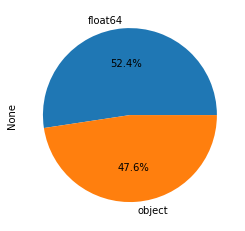

In [15]:
new_big_df.dtypes.value_counts(normalize=True).plot.pie(autopct="%1.1f%%")

##### a.  La variable 'main_category'

In [16]:
print('le nombre des catégories principales est : ',len(new_big_df['main_category'].unique()))

le nombre des catégories principales est :  30983


Text(0.5, 1.0, 'Classement des 15 categories les plus fréquents')

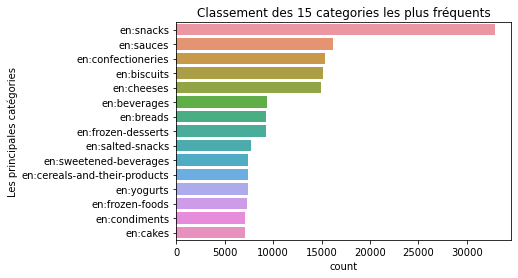

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(y="main_category", data=new_big_df, order=pd.value_counts(new_big_df['main_category']).iloc[:15].index)
plt.ylabel("Les principales catégories")
plt.title("Classement des 15 categories les plus fréquents")

In [18]:
#Formater les noms des catégories en supprimant les trois pemiers caractères (en:)
new_big_df['main_category'] = new_big_df['main_category'].str[3:]
new_big_df['main_category'].unique()

array([nan, 'mustards', 'xsf', ..., 'vegetarian-ground-pork-substitute',
       'pekinois', 'extrudált-kukorica'], dtype=object)

In [19]:
print('le nombre des catégories principales est : ',len(new_big_df['main_category'].unique()))

le nombre des catégories principales est :  29843


##### b. La variable 'product_name'

Text(0.5, 1.0, 'Classement des 15 produits les plus fréquents')

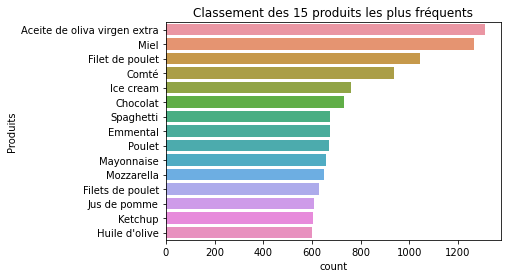

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(y="product_name", data=new_big_df, order=pd.value_counts(new_big_df['product_name']).iloc[:15].index)
plt.ylabel("Produits")
plt.title("Classement des 15 produits les plus fréquents")

### 3.2 - Analyser les variables catégorielles
Les variables catégorielles sont :'nutriscore_score','ecoscore_score_fr','additives_n','ingredients_from_palm_oil_n'?  



In [21]:
#convertir le type de la variable 'nova_group'de float --> category. 
new_big_df['nova_group'] = new_big_df['nova_group'].astype('category')

In [22]:
print ("le type de la variable 'nova_group' est désormais : ", new_big_df['nova_group'].dtypes)

le type de la variable 'nova_group' est désormais :  category


In [23]:
new_big_df.rename(columns = {'ecoscore_grade_fr':'ecoscore_grade'}, inplace = True)

In [24]:
#formater les libellés du nutriscore_grade et ecoscore_grade: miniscule --> majuscule
new_big_df['nutriscore_grade'] = new_big_df['nutriscore_grade'].str.upper()
new_big_df['ecoscore_grade'] = new_big_df['ecoscore_grade'].str.upper()


######  Visualisation de la répartition des variables catégorielles

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


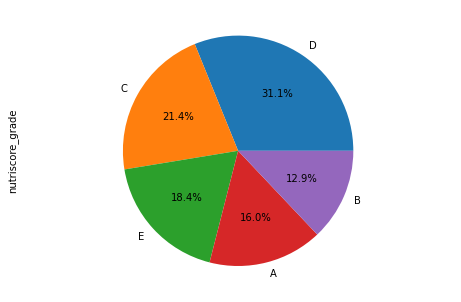

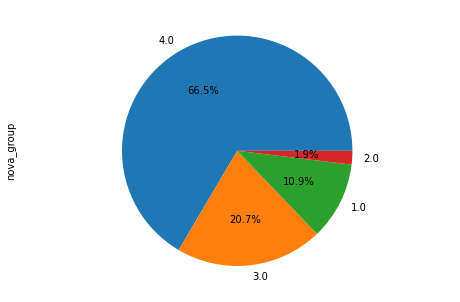

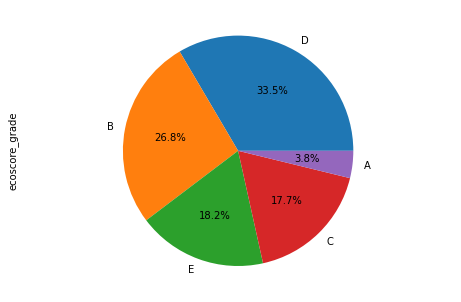

In [25]:
categ_var=['nutriscore_grade','nova_group','ecoscore_grade']
for col in categ_var:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis("equal")
    unique_vals=new_big_df[col].value_counts(normalize=True)
    unique_vals.plot.pie(autopct="%1.1f%%")

##### Remarque:  
Nous remarquons que la visualisation de la répartition des valeurs 'additives_n' et 'ingredients_from_palm_oil_n' dans le pie plot n'est pas très claire. Nous la renforçerons par un countplot.

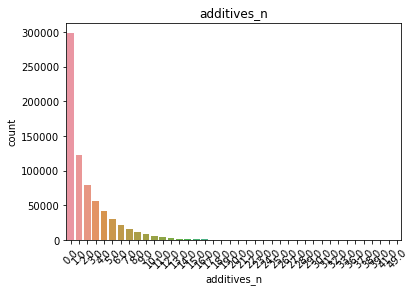

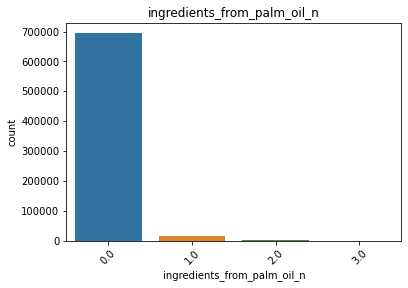

In [26]:
countplot_var_list=[ 'additives_n' , 'ingredients_from_palm_oil_n']
for var in countplot_var_list:
    sns.countplot(x=var, data=new_big_df)
    plt.title(var)
    plt.xticks(rotation=45)
    plt.show()

### Conclusions:
**1-** D'après le heatmap-nans, on remarque que les lignes contenants des valeurs manquantes de nutriscrore_grade sont eux même contenant des valeurs manquantes de nutriscore_score. Reste à vérifier si le nutriscore-grade correspond vraiment au nutriscore-score.  Pareil pour ecoscrore_grade et ecoscore_score.  

**2-** Nous avons formater les nom de classes de nutrigrade et ecograde du minuscule vers majuscule.  

**3-** Nous avons formaté les noms de catégories en supprimant les trois lettres au début du nom et en laissant juste le nom significatif.  

**4-** 'ecoscore_grade_fr' et 'nutriscore_grade' ne contiennent que 5 valeurs distinctes. nova_group ne contient que 4 valeurs. ingredients_from_palm_oil_n ne contient que 40 valeus  --> Nous avons transformé leur type de 'object' vers 'category' --> diminuer davantage la taille du dataframe.   

**5-** Les produits les plus fréquents dans notre dataset sont "les plats à l'huile d'olive" et "le miel".  

**6-** La catégorie des produits la plus fréquente est "snacks" 

**7-** La majorité des produits ne contiennet pas des ingrédients provenant de huile de palme. 


##### Vérifier les distributions de nutriscore_grade
- Je vais essayer de diviser la variable nutriscore_grade en cinque sous-ensembles dépendamment des cinque catégorie présentes. Ceci pour visuliser la distribution de différentes distributions. 

- En deuxième lieu, je vais essayer de diviser la variable ecoscore_grade en cinque sous-ensembles dépendamment des cinque catégorie présentes. Ensuite, je vais visualiser la relation entre ecoscore-grade et ecoscore-score.  

In [27]:
#Création de cinq sous-ensembles de nutriscore-grade
df_nutriscore_A= new_big_df[new_big_df['nutriscore_grade']=='A']
df_nutriscore_B= new_big_df[new_big_df['nutriscore_grade']=='B']
df_nutriscore_C= new_big_df[new_big_df['nutriscore_grade']=='C']
df_nutriscore_D= new_big_df[new_big_df['nutriscore_grade']=='D']
df_nutriscore_E= new_big_df[new_big_df['nutriscore_grade']=='E']

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

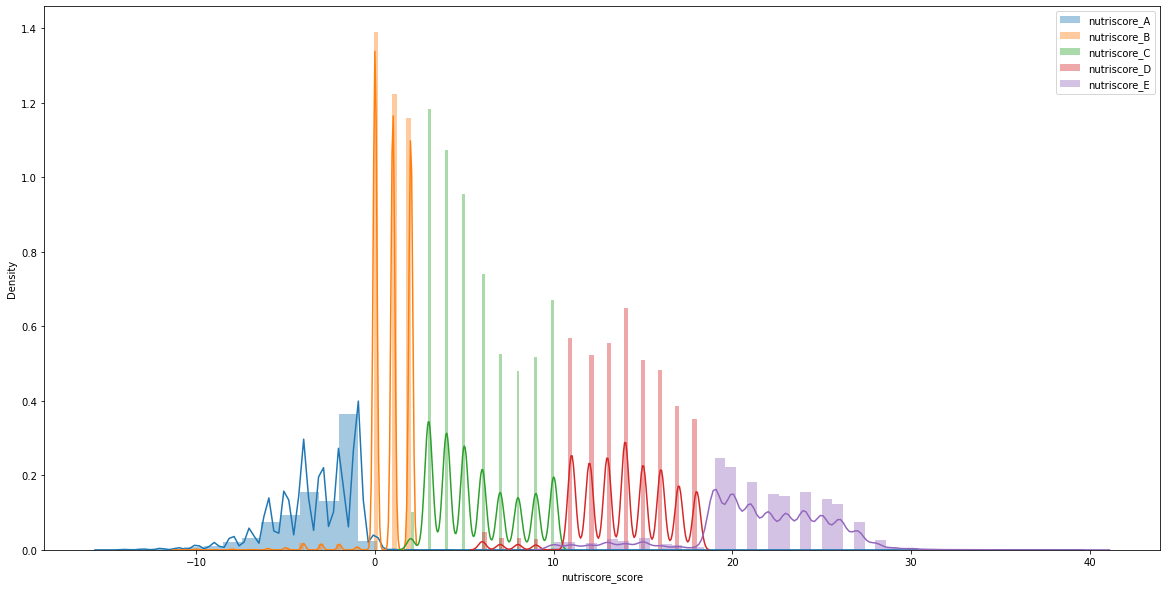

In [28]:
col='nutriscore_score'
plt.figure(figsize=(20,10))
sns.distplot(df_nutriscore_A[col], label='nutriscore_A')
sns.distplot(df_nutriscore_B[col], label='nutriscore_B')
sns.distplot(df_nutriscore_C[col], label='nutriscore_C')
sns.distplot(df_nutriscore_D[col], label='nutriscore_D')
sns.distplot(df_nutriscore_E[col], label='nutriscore_E')
plt.legend()

##### Vérifier les distributions d' ecoscore_grade
- je vais essayer de diviser la variable ecoscore_grade en cinque sous-ensembles dépendamment des cinque catégorie présentes. Ensuite, je vais visualiser la répartition de ces différentes distributions.

In [29]:
#Création de cinq sous-ensembles d'ecoscore-grade
df_ecoscore_A= new_big_df[new_big_df['ecoscore_grade']=='A']
df_ecoscore_B= new_big_df[new_big_df['ecoscore_grade']=='B']
df_ecoscore_C= new_big_df[new_big_df['ecoscore_grade']=='C']
df_ecoscore_D= new_big_df[new_big_df['ecoscore_grade']=='D']
df_ecoscore_E= new_big_df[new_big_df['ecoscore_grade']=='E']

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

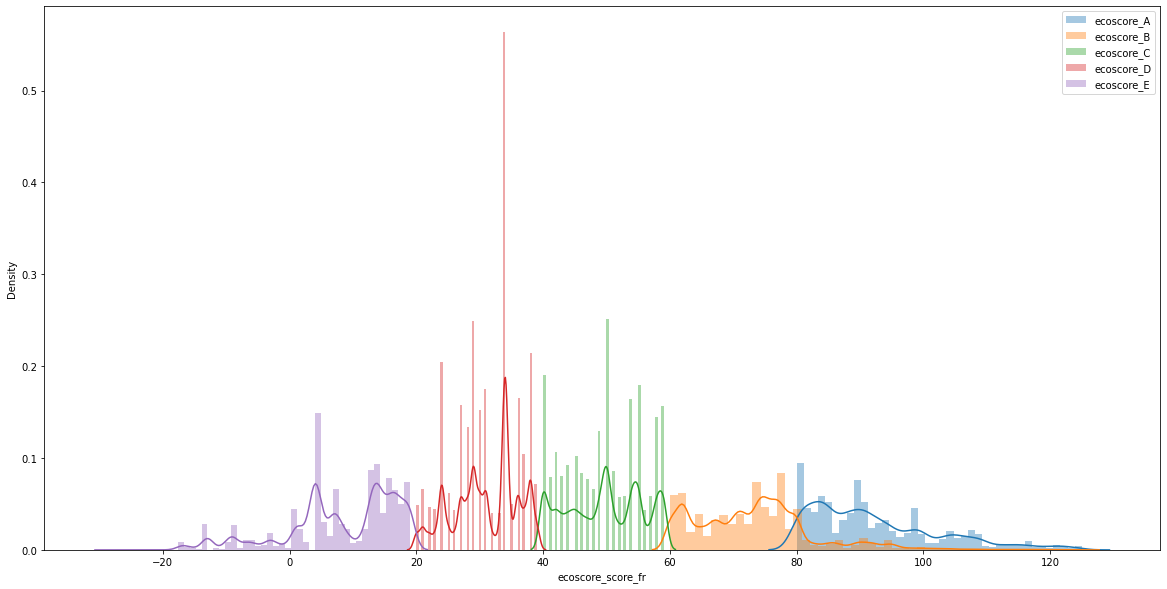

In [30]:
col='ecoscore_score_fr'
plt.figure(figsize=(20,10))
sns.distplot(df_ecoscore_A[col], label='ecoscore_A')
sns.distplot(df_ecoscore_B[col], label='ecoscore_B')
sns.distplot(df_ecoscore_C[col], label='ecoscore_C')
sns.distplot(df_ecoscore_D[col], label='ecoscore_D')
sns.distplot(df_ecoscore_E[col], label='ecoscore_E')
plt.legend()

In [31]:
# définir une fonction qui permet de détecter les anomalies pour une variable
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    print ('std = ',random_data_std)
    random_data_mean = np.mean(data)
    print('mean = ', random_data_mean)
    anomaly_cut_off = random_data_std * 3
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print('lower_limit : ', lower_limit)
    print('upper_limit : ', upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    print ('\nLe nombre total des valeurs est : ',  data.count())
    print ('Le pourcentage des valeurs aberrantes est : ', round((len(anomalies)/ data.count())*100,2), '%')
    print ('Le nombre des valeurs outliers est : ',len(anomalies), '. Ils sont : ')
    
    

In [32]:
find_anomalies(df_ecoscore_A.ecoscore_score_fr)
find_anomalies(df_ecoscore_B.ecoscore_score_fr)
find_anomalies(df_ecoscore_C.ecoscore_score_fr)
find_anomalies(df_ecoscore_C.ecoscore_score_fr)
find_anomalies(df_ecoscore_E.ecoscore_score_fr)

std =  10.259862835577291
mean =  92.42684869169511
lower_limit :  61.647260184963244
upper_limit :  123.20643719842698

Le nombre total des valeurs est :  17580
Le pourcentage des valeurs aberrantes est :  0.52 %
Le nombre des valeurs outliers est :  91 . Ils sont : 
std =  9.527179233783622
mean =  73.34092305701995
lower_limit :  44.75938535566908
upper_limit :  101.92246075837082

Le nombre total des valeurs est :  123676
Le pourcentage des valeurs aberrantes est :  1.36 %
Le nombre des valeurs outliers est :  1681 . Ils sont : 
std =  5.9647531076966445
mean =  49.65844302277128
lower_limit :  31.764183699681347
upper_limit :  67.5527023458612

Le nombre total des valeurs est :  81594
Le pourcentage des valeurs aberrantes est :  0.0 %
Le nombre des valeurs outliers est :  0 . Ils sont : 
std =  5.9647531076966445
mean =  49.65844302277128
lower_limit :  31.764183699681347
upper_limit :  67.5527023458612

Le nombre total des valeurs est :  81594
Le pourcentage des valeurs aberrante

### 3.3 Analyse de la distribution des variables quantitatives

In [33]:
for column in new_big_df:
    if new_big_df[column].dtype == 'float64':
        new_big_df[column]=pd.to_numeric(new_big_df[column], downcast='float')
    if new_big_df[column].dtype == 'int64':
        new_big_df[column]=pd.to_numeric(new_big_df[column], downcast='integer')

In [34]:
util.variable_survey(new_big_df)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,code,object,1906318,0.0 %
1,product_name,object,1192378,4.17 %
2,countries,object,10580,0.3 %
3,categories,object,103646,52.75 %
4,main_category,object,29842,52.75 %
5,nutriscore_score,float32,56,63.36 %
6,nutriscore_grade,object,5,63.36 %
7,nova_group,category,4,67.57 %
8,additives_n,float32,40,62.88 %
9,ingredients_from_palm_oil_n,float32,4,62.88 %


In [35]:
new_big_df.columns

Index(['code', 'product_name', 'countries', 'categories', 'main_category',
       'nutriscore_score', 'nutriscore_grade', 'nova_group', 'additives_n',
       'ingredients_from_palm_oil_n', 'ecoscore_score_fr', 'ecoscore_grade',
       'energy_100g', 'fiber_100g', 'fat_100g', 'sugars_100g', 'salt_100g',
       'proteins_100g', 'pnns_groups_1', 'pnns_groups_2', 'final_categories'],
      dtype='object')

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


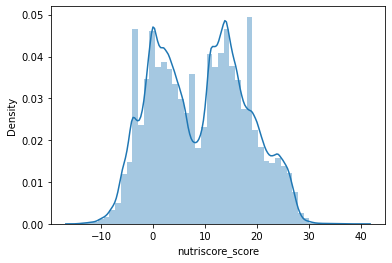

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


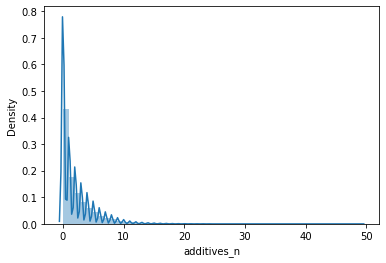

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


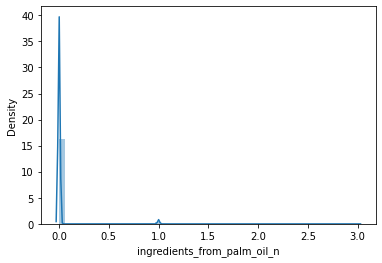

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


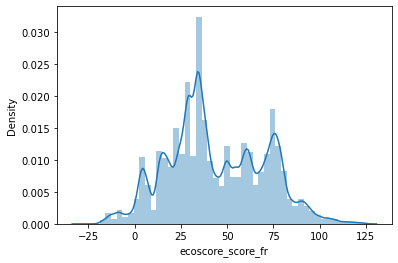

<Figure size 864x432 with 0 Axes>

C:\Users\badii\.conda\envs\openclassrooms_projects\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

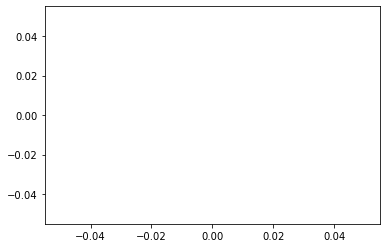

In [36]:
for var in new_big_df.columns:
    if new_big_df[var].dtypes == 'float32':
        sns.distplot(new_big_df[var], label=var)
        plt.figure(figsize=(12,6))
        plt.show()

In [ ]:
find_anomalies(new_big_df.nutriscore_score)

In [ ]:
find_anomalies(new_big_df.ecoscore_score_fr)

In [ ]:
find_anomalies(new_big_df.additives_n)

In [ ]:
find_anomalies(new_big_df.proteins_100g)

In [ ]:
#renforcer la visualisation du comportement des variables quantitatives en utilisant les boxplots
var_cols=['nutriscore_score', 'ecoscore_score_fr','energy_100g', 'fiber_100g', 'fat_100g', 'sugars_100g', 'salt_100g',
       'proteins_100g']
for var in new_big_df.columns:
    if new_big_df[var].dtypes == 'float32':
        sns.boxplot(x=var, data=new_big_df)
        plt.title(var)
        plt.show()

Afin de mieux comprendre le comportement de ces variables quantitatives, j'accompagne les boxplots par une description
détaillée de différents indices statistiques: la fonction describe()

In [ ]:
new_big_df.describe()

### Remarques:  
**1-** La variable "nova_group" n'a que 4 valeurs possibles --> c'est plut tôt une variable de type catégorie et non pas float --> Il faut changer son type  

**2-** Les variables 'nutriscore_score','additives_n' et 'ecoscore_score' ne suivent pas une distribution normale. Ceci peut être dû à:  
- un échantillon de très grande taille,  
- présence de outliers ou sont constatés des mélanges de distributions  
- Valeurs non normalisés --> distribution asymétrique  

**3-** Si on suppose que les valeurs aberrantes sont celles hors de l'intervalle [moy-3*STD , moy+3*STD], alors nous constatons que le pourcentage des valeurs aberrantes des variables:  
   - nutriscore_score:  0.01 %
   - ecoscore_score_fr: 0.06 %  
   
**-->** Les pourcentages de présence des outliers est négligeable, il vaut mieux supprimer les lignes qui les contiennent.

# 4. Analyse bivariée
### 4.1. Var quantitative/ quantitative

In [ ]:
# corrélation entre tous les variables quantitatives
corr_df = new_big_df.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True,square=True,linewidths=.5)
plt.title("Matrice de corrélation entre les variables quantitatives")
plt.show()

##### Remarques  
- Nous remarquons qu'il y a une forte corrélation (0.74) entre **fat_100g** et **proteins_100g**  
- Nous remarquons qu'il y a une corrélation assez forte (0.68) entre **sugars_100g** et **proteins_100g** 
- La corrélation entre **ecoscore_score** et les autres variables quantitatives est assez faible. Je pense pas qu'on put prédire la valeur d'ecoscore à partir d'eux.   

Une analyse de linéarité (courbes de regressions dans un nuage de points) entre ces variables s'avère interessante afin de confirmer ou non ces hypothèses.  

- Linéarité entre 'sugar_100g' / 'proteins_100g'

In [ ]:
cols=['sugars_100g','fat_100g']
sns.lmplot(x='proteins_100g', y ='sugars_100g', data=new_big_df)
plt.xlim(new_big_df["proteins_100g"].min(), new_big_df["proteins_100g"].max())
plt.ylim(new_big_df["sugars_100g"].min(), new_big_df["sugars_100g"].max())
plt.show()

- Linéarité entre 'fat_100g' / 'proteins_100g'

In [ ]:
sns.lmplot(x='proteins_100g', y ='fat_100g', data=new_big_df)
plt.xlim(new_big_df["proteins_100g"].min(), new_big_df["proteins_100g"].max())
plt.ylim(new_big_df["fat_100g"].min(), new_big_df["fat_100g"].max())
plt.show()

- Linéarité entre 'nutriscore_score' / 'proteins_100g'

In [ ]:
sns.lmplot(x='proteins_100g', y ='nutriscore_score', data=new_big_df)
plt.xlim(new_big_df["proteins_100g"].min(), new_big_df["proteins_100g"].max())
plt.ylim(new_big_df["nutriscore_score"].min(), new_big_df["nutriscore_score"].max())
plt.show()

In [ ]:
#import scipy.stats as st
#print(st.pearsonr(new_big_df["proteins_100g"],new_big_df["sugars_100g"])[0])
#print(np.cov(new_big_df["proteins_100g"],new_big_df["sugars_100g"],ddof=0)[1,0])

- Linéarité entre 'nutriscore_score' / 'energy_100g'

In [ ]:
sns.lmplot(x='energy_100g', y ='nutriscore_score', data=new_big_df)
plt.show()